# Clustering Example
This is an example of how a simple KMeans Algorithm can be run - we will run this code using the Iris dataset found in sklearn, and visualise the clusters after reducing them to 2 dimensions.

In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.DataFrame(datasets.make_blobs(n_samples=1000, n_features = 20, centers = 10, random_state = 123)[0])

### Fitting the KMeans Model
We use a basic of 3 clusters to fit the model. We will talk more about choosing the best number of clusters later on

In [3]:
model = KMeans(3)
model.fit(data)

KMeans(n_clusters=3)

In [4]:
labels = model.predict(data)
print(labels[:100])

[2 2 0 2 0 1 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 1 2 0 0 1 1 1 2 0 1 2 0 2 1
 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 0 2 2 1 1 1 0 2
 2 2 2 2 2 0 0 1 0 0 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2]


### Visualising our results

As the iris dataset has 3 features, we are not able to immediately plot the scatter plot out. As such, we can reduce to 2 dimension by using dimension reduction techniques. 1 popular technique is to use PCA (principal component analysis). The technique reduces our data into N principal components, which are all orthogonal to each other.

In [5]:
from sklearn.decomposition import PCA

In [6]:
data_reduced = pd.DataFrame(PCA(2).fit_transform(data))

In [7]:
data_reduced["labels"] = labels

Personally I like to use Seaborn package to visualise the data as it is easy to colour code the points by the cluster labels

<AxesSubplot:xlabel='0', ylabel='1'>

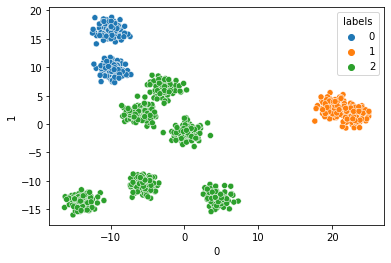

In [8]:
sns.scatterplot(data = data_reduced, x = 0, y = 1, hue = "labels", palette = 'tab10')

### Optimizing the best number of clusters to fit the data

Inertia is the sum of squared distance of samples to their closest cluster center. We would like this number to be as small as possible. We can fit Kmeans with a range of clusters, and then plot the inertia to observe the best no. clusters for our dataset

### Question:
How can we make inertia = 0, since the smaller the inertia, the better the fit?

In [9]:
model.n_clusters

3

In [10]:
print("No. Clusters: ", model.n_clusters)
print("Inertia: ",model.inertia_)

No. Clusters:  3
Inertia:  333195.58487274643


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

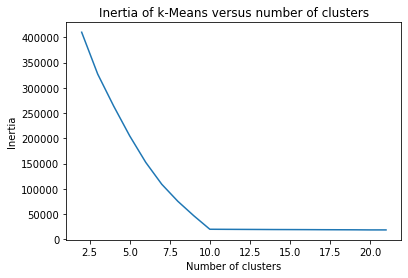

In [11]:
max_clust = 20
scores = [KMeans(n_clusters=i+2).fit(data).inertia_ for i in range(max_clust)]
sns.lineplot(list(range(2,(max_clust+2))), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

As we can see from the graph, the gradient of the elbow plot slows after cluster = 10. This signals to us that 10 is a good  number to fit a KMeans model (provided that we can make sense of 10 clusters when we are analysing the output)

## Challenge
Using a new dataset, run find the best number of clusters to cluster it

In [12]:
grains = pd.read_csv("Seed_Data.csv").iloc[: , :-1]

In [13]:
print(grains.shape)
grains.head()

(210, 7)


,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


### Your turn:
Find the best number of clusters. As a general rule of thumb, your number of clusters need not exceed 10

In [ ]:
<... For you to fill in with code...>

In [ ]:
best_clust = ## For you to fill in